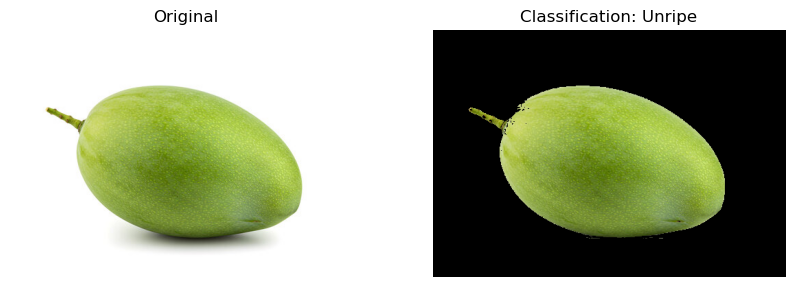

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

ripe_lower = np.array([20, 100, 100])    
ripe_upper = np.array([35, 255, 255])

unripe_lower = np.array([35, 50, 50])    
unripe_upper = np.array([85, 255, 255])

image_files = glob.glob("image.png") 

for file in image_files:
    img = cv2.imread(file)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask_ripe = cv2.inRange(hsv, ripe_lower, ripe_upper)
    mask_unripe = cv2.inRange(hsv, unripe_lower, unripe_upper)

    ripe_count = cv2.countNonZero(mask_ripe)
    unripe_count = cv2.countNonZero(mask_unripe)

    if ripe_count > unripe_count:
        classification = 'Ripe'
    else:
        classification = 'Unripe'

    result = cv2.bitwise_and(img, img, mask=mask_ripe + mask_unripe)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f'Classification: {classification}')
    plt.axis('off')

    plt.show()
